In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup
os.chdir("..")
plt.style.use("ggplot")

%matplotlib inline

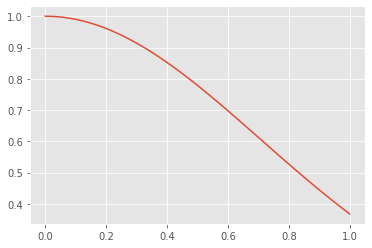

In [3]:
def f(x):
    return np.exp(-x**2)

t = np.linspace(0,1,100)
y = f(t)
plt.plot(t,y)

In [4]:
from gp.kernels import RBF
from gp.models import GPRegressor

In [5]:
ker = RBF(input_dim=1, l=1, sigma=1)
gpr = GPRegressor(kernel_function=ker)
gpr._param

{'log_l': 0.0, 'log_sigma': 0.0, 'log_noise': -23.025850929940457}

In [6]:
n = 5
x = np.random.uniform(size=n)
yt = f(x)

gpr.fit_optimize(x[:,None],yt)
print(gpr._loglik, gpr._grad)

# Starting optimization
#1: log_lik=13.888469097997408; parameters={'log_l': 0.0, 'log_sigma': 0.0, 'log_noise': -23.025850929940457}
#2: log_lik=14.091515524888752; parameters={'log_l': 0.039975350070963034, 'log_sigma': -0.026916685530450197, 'log_noise': -23.025850929941225}
#3: log_lik=14.200420317307138; parameters={'log_l': 0.06711969079842675, 'log_sigma': -0.050170353346038615, 'log_noise': -23.02585092994203}
#4: log_lik=14.25541810006522; parameters={'log_l': 0.0827288427736312, 'log_sigma': -0.07009082626551391, 'log_noise': -23.025850929942855}
#5: log_lik=14.287172671581594; parameters={'log_l': 0.0897467418656379, 'log_sigma': -0.08744593224022539, 'log_noise': -23.02585092994369}
#6: log_lik=14.310932054372872; parameters={'log_l': 0.09146679160408895, 'log_sigma': -0.10310269306181, 'log_noise': -23.02585092994453}
#7: log_lik=14.33200873611233; parameters={'log_l': 0.09037795550115335, 'log_sigma': -0.11771823597839104, 'log_noise': -23.02585092994537}
#8: log_lik=14.3

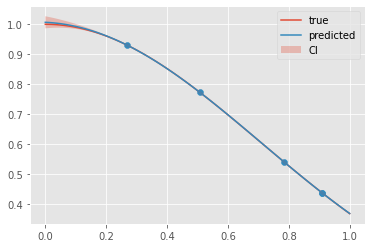

In [7]:
yp, std = gpr.predict(t[:,None], return_std=True)
plt.plot(t,y,label="true")
plt.plot(t,yp,label="predicted")
plt.fill_between(
    t,
    yp-1.96*std,
    yp+1.96*std,
    alpha=0.3,
    label="CI"
)
plt.scatter(x,yt)
plt.legend()

In [8]:
sample_size = 5
ys = gpr.sample(t[:, None], size=sample_size)

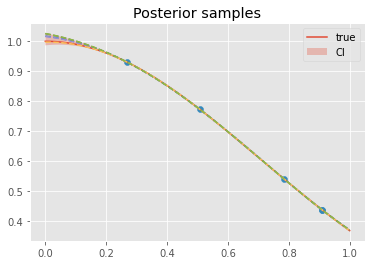

In [9]:
plt.plot(t,y,label="true")
for k in range(sample_size):
    plt.plot(t, ys[k, :], '--')
plt.fill_between(
    t,
    yp-1.96*std,
    yp+1.96*std,
    alpha=0.3,
    label="CI"
)
plt.scatter(x,yt)
plt.title('Posterior samples')
plt.legend()